## DreliaCalc Report

In [1]:
import arrow; print(arrow.now('Europe/Vienna').format('DD.MM.YYYY - HH:mm'))
#from datetime import datetime; print(datetime.now().strftime('%d.%m.%Y - %H:%M'))

24.03.2023 - 10:02


In [2]:
import dmyplant2
import pandas as pd
import numpy as np
from tabulate import tabulate
from pprint import pprint as pp

In [3]:
# load input data from files
dval = dmyplant2.Validation.load_def_csv("out.csv")
failures = dmyplant2.Validation.load_failures_csv("failures.csv")
psize = (12,8)

## Validation Engines:

In [4]:
dmyplant2.cred()
mp = dmyplant2.MyPlant(300)
mp.login()

In [25]:
vl = dmyplant2.Validation.from_dval(mp,dval, cui_log=False) 

VAL Engines: 100%|████████████████████████| 51/51 [00:02<00:00, 20.30 engines/s]


In [26]:
d = vl.dashboard
d              

Name Engine ID Design Number  \
0                                            ABINSK       M09          Y203   
1                                   BLESSED TEXTILE       M01          Y386   
2                               ROCHE PENZBERG KWKK       M01          U233   
3                                 BMW LANDSHUT 4.10        M4          U781   
4                                            ABINSK       M02          Y199   
5                                            ABINSK       M10          Y204   
6                                BMW DINGOLFING 2.4        M7          X263   
7                                       BMW MÜNCHEN        M1          U779   
8                                     KAMAL LIMITED       M01          Y395   
9                                BMW DINGOLFING 2.4        M6          X263   
10               POLYNT - 2 (1145166-T241) --> Sept       M02          T241   
11                                      BMW MÜNCHEN        M2          U779   
12                       ECOGEN ENERGY SYSTEMS BVBA       M02          U658   
13                                BMW REGENSBURG M5        M5          T966   
14  PROSPERITY WEAVING MILLS LTD - 1 (1351388-X243)       M01          X243   
15                                       Salmmeir 1       M01          Y809   
16                                BMW REGENSBURG M3        M3          I448   
17                                      BMW MÜNCHEN        M3          U779   
18                                           ABINSK       M06          Y202   
19                                      BMW MÜNCHEN        M1          V008   
20                                BMW LANDSHUT 4.10        M3          U781   
21                               BMW REGENSBURG M2         M2          I448   
22                                       Salmmeir 2       M02          Y809   
23                                      BMW MÜNCHEN        M2          V008   
24                              FRONERI - FERENTINO       M01          X580   
25                                      BMW MÜNCHEN        M3          V008   
26                                      BMW MÜNCHEN        M4          V008   
27                                      GAZ DE LACQ       M03          X077   
28                                  SOTERNIX RENOVE       M01          U763   
29                                          Tomaver       M01          V155   
30                                 LES COURONNERIES       M01          V229   
31                                  BMW LANDSHUT M1        M1          U781   
32                                          MEKOTEX       M01          P591   
33                                  Lallemand CHP 2       M02          X184   
34                                           DALOMA       M01          V624   
35                                          MEKOTEX       M01          P563   
36                                        EC MIELEC       M01          I430   
37                                       Den Berk 1       M01          F725   
38                                BMW REGENSBURG M1        M1          I448   
39                      VITACRESS - RUNCTON CHP - 1       M01          U685   
40                                              SKY       M01          V591   
41                                YUKON ENERGY CORP       M02          R491   
42                                Lallemand  CHP 1        M01          X184   
43                                      BMW MÜNCHEN       M01          N561   
44                                        TOM VILLE       M01          X684   
45                                      Beirinckx 3       M03          X303   
46                                     PROLEITE - 1       M01          X289   
47                                       Tomco 620        M01          X803   
48                                           ABINSK       M12          AJ08   
49                                           ABINSK       M13          AJ09   

   Engine Type En

In [7]:
# remove the semicolon to see a dict with available datapoints in myplant
mp.fetch_available_data();

In [8]:
# RCA piston fleet status overview
vl.quick_report()

50 Engines / 1012 PU's in Validation Fleet.

34 Validation Engines UP and Running
15 Validation Engines not Running:
 1 Validation Engine(s) with unknown Running Condition:

  23193 fleet leader oph
  13441 50% quantile / median oph
  13246 average oph
  19593 average of top ten oph
   4613 average of last ten oph

 662325 cumulated oph


Engines without contact:



Engines not running:



Engines with Alarm FLag != 0 or Tripped condition:


Name      id  Count_OpHour  Power_PowerAct  \
0              1386177 ABINSK  130891       23228.0             0.0   
15         1415409 Salmmeir 1  133716       19263.0             0.0   
20  1320114 BMW LANDSHUT 4.10  117547       19735.0             0.0   
37         1253545 Den Berk 1  161783       77193.0             0.0   
40                1338846 SKY  115670           4.0             0.0   

   OperationalCondition  Various_Bits_CollAlarm  
0            No Contact                     1.0  
15       Decommissioned                     1.0  
20              Tripped                     1.0  
37           No Contact                     1.0  
40        Not Available                     1.0

## Success Run Plot, beta=1.21 & 1.5 with failures 

In [9]:
# status 08/2021 - failures are not updates automatically, please write failures manually into failures.csv
from tabulate import tabulate
print(tabulate(failures, headers=failures.columns))

    date                   failures    serialNumber  comment
--  -------------------  ----------  --------------  -----------------------------------------------------------------------------------------------------------------
 0  2020-12-28 00:00:00           1         1319151  München V008 M1 Z8 - Reiber, mit Boroskop am 28.12.2020 festgestellt, Cold Scuff, Motor lief 431 Stunden nach BSI
 1  2021-07-15 00:00:00           1         1386260  Abinsk M10 - Z9 Ventilabrisse und Crown - Separation, Originator currently unknown


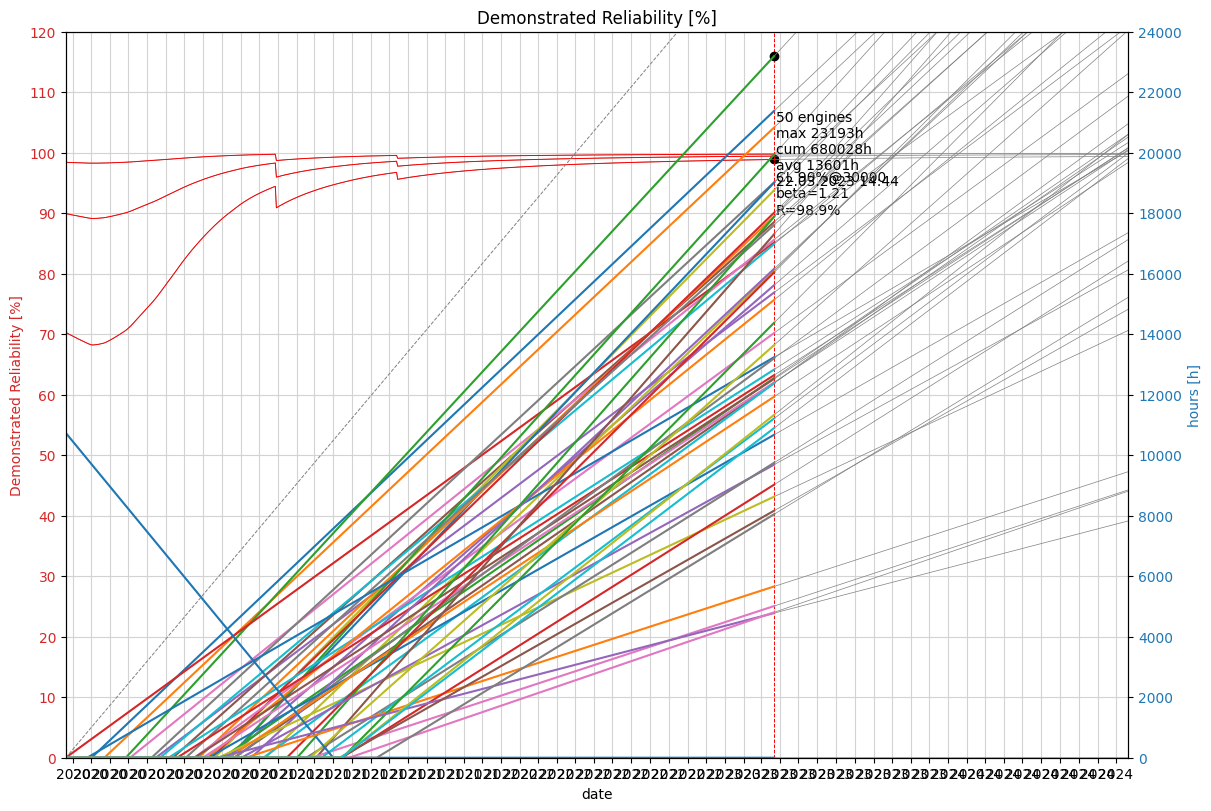

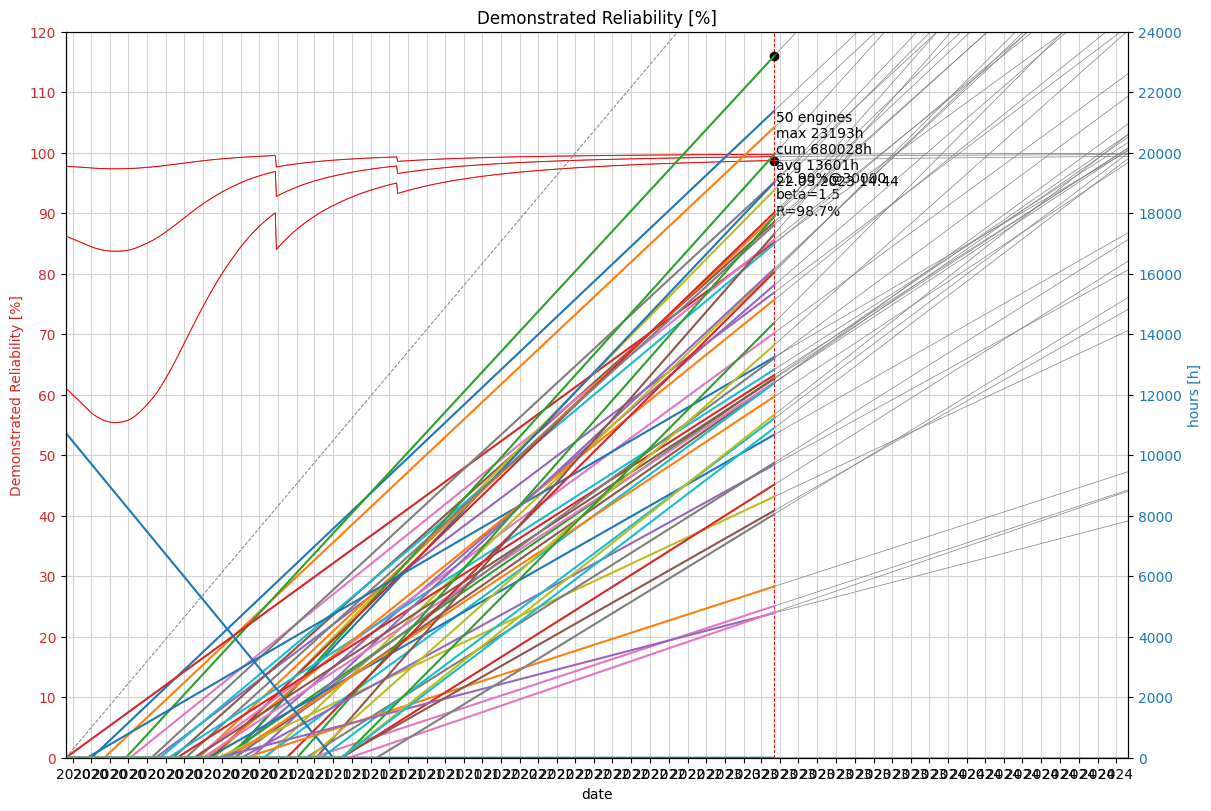

In [10]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.5);
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.5);

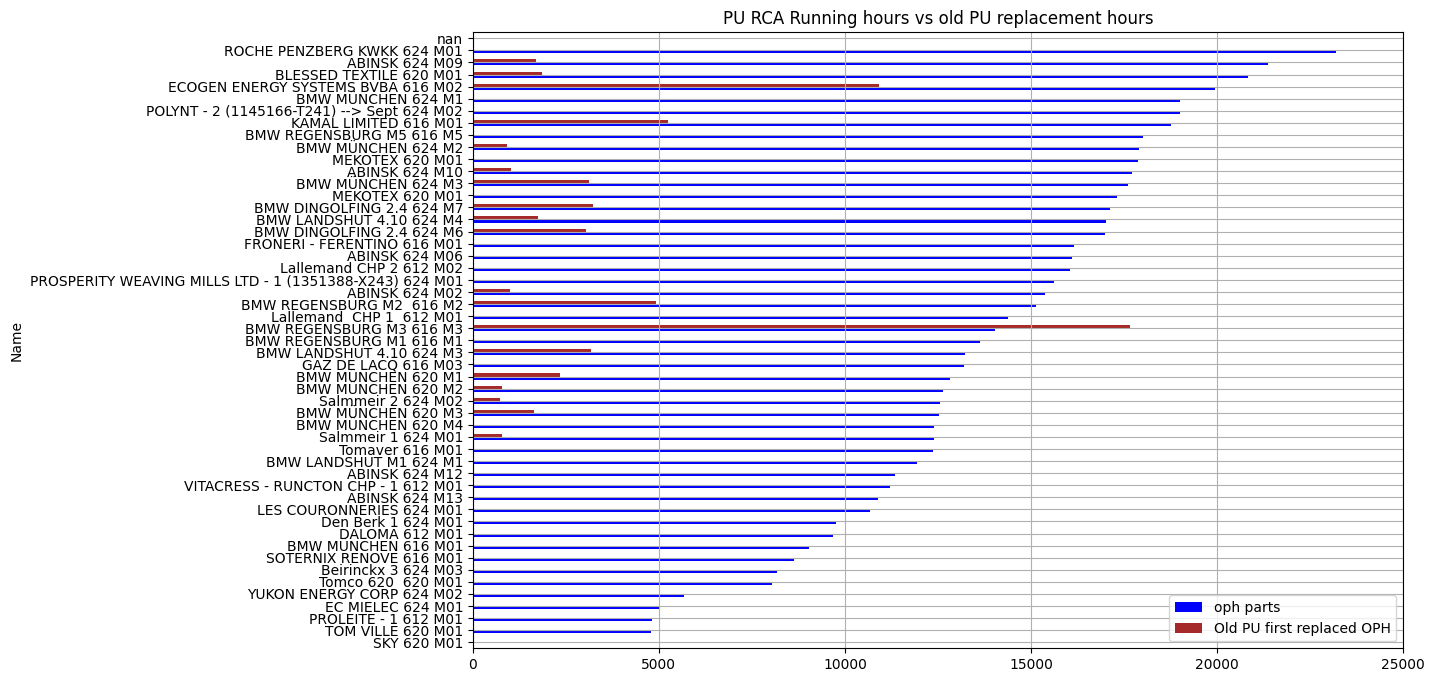

In [11]:
dd = d[['Name','oph parts','BMEP', 'LOC','Engine Type','Engine ID']].copy()
dd['Name'] = d['Name'] + ' ' + d['Engine Type'] + ' ' + d['Engine ID']
dc =  pd.concat([dd, dval[['Old PU first replaced OPH','Old PUs replaced before upgrade']]],axis=1).set_index('Name').sort_values(by = "oph parts",ascending=True)
dc.plot.barh(y=['oph parts','Old PU first replaced OPH'],figsize=psize, xlim=(0,25000), color=['blue','brown'], grid=True, title="PU RCA Running hours vs old PU replacement hours");

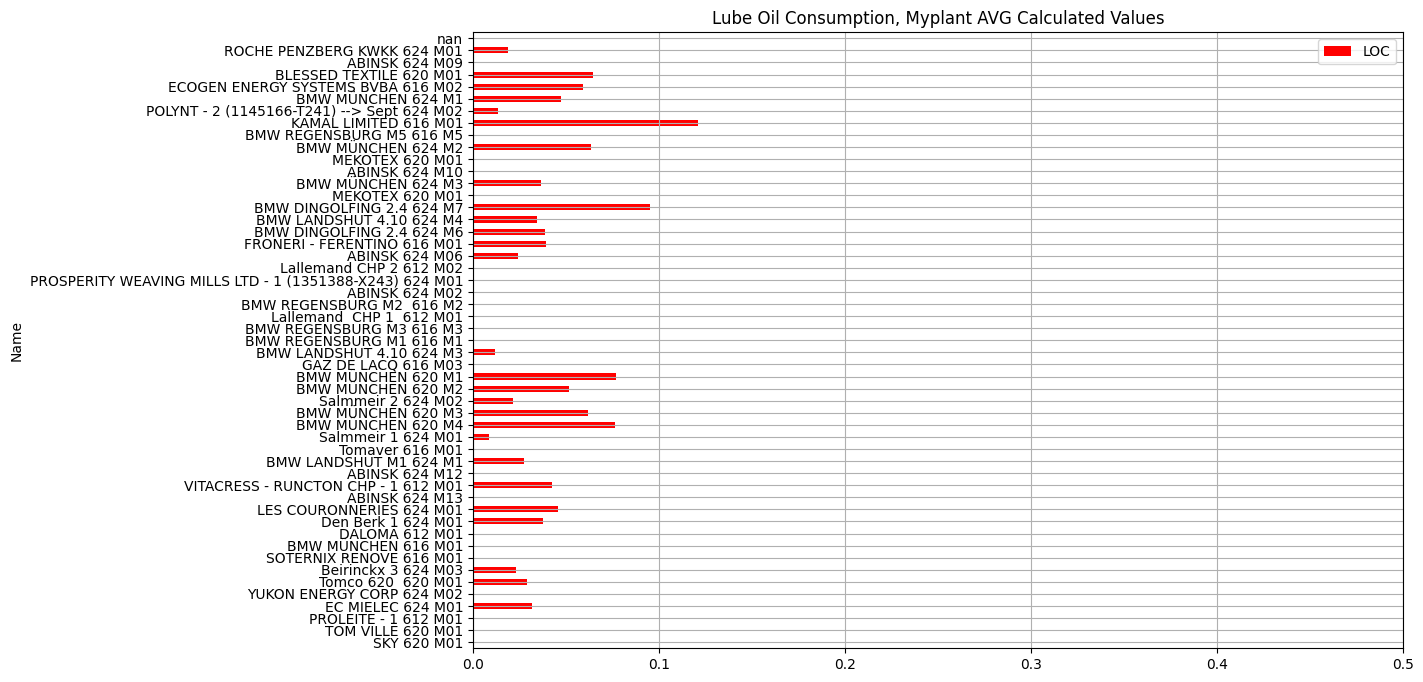

In [12]:
dc.plot.barh(y=['LOC'],figsize=psize, xlim=(0,0.5), color=['red'], grid=True, title='Lube Oil Consumption, Myplant AVG Calculated Values');

## Detailed plot

In [13]:
# Remove the semicolon on the next line to see all serial numbers
d[['Name','Engine Type','Engine ID','serialNumber']].sort_values(by='Name');

In [14]:

#e=dmyplant2.Engine.from_sn(mp,1184199)
e=vl.eng_serialNumber(1184199)
print(f"{e}")
e.dash

1184199 ROCHE PENZBERG KWKK


{'Name': 'ROCHE PENZBERG KWKK',
 'Engine ID': 'M01',
 'Design Number': 'U233',
 'Engine Type': '624',
 'Engine Version': 'H02',
 'P': 24,
 'P_nom': 4404.0,
 'BMEP': 24.0,
 'serialNumber': '1184199',
 'id': 108532,
 'Count_OpHour': 48401.0,
 'val start': Timestamp('2020-04-27 00:00:00'),
 'oph@start': 25208,
 'oph parts': 23193.0,
 'LOC': 0.019}

In [15]:
dtrips = e.batch_hist_alarms(p_severities=[800], p_offset=0, p_limit=5)
dtrips['datetime'] = pd.to_datetime(dtrips['timestamp'] * 1000000.0).dt.strftime("%m-%d-%Y %H:%m")
print(tabulate(dtrips[['datetime', 'message', 'name','severity']]))


-  ----------------  ----------------------------  ----  ---
0  03-07-2023 10:03  Fail safe loop tripped        1056  800
1  03-07-2023 10:03  Emergency stop / safety loop  1031  800
2  03-07-2023 10:03  Gas pre-alarm                 1052  800
3  03-07-2023 10:03  Gas alarm                     1053  800
4  03-06-2023 13:03  Engine oil level low          1018  800
-  ----------------  ----------------------------  ----  ---


In [16]:
dtrips = e.batch_hist_alarms(p_severities=[600], p_offset=0, p_limit=10)
dtrips['datetime'] = pd.to_datetime(dtrips['timestamp'] * 1000000.0).dt.strftime("%m-%d-%Y %H:%m:%S")
print(tabulate(dtrips[['datetime', 'message', 'name','severity']]))

-  -------------------  --------------  ----  ---
0  03-22-2023 13:03:45  Hourly message  9007  600
1  03-22-2023 12:03:44  Hourly message  9007  600
2  03-22-2023 11:03:44  Hourly message  9007  600
3  03-22-2023 10:03:44  Hourly message  9007  600
4  03-22-2023 09:03:44  Hourly message  9007  600
5  03-22-2023 08:03:44  Hourly message  9007  600
6  03-22-2023 07:03:44  Hourly message  9007  600
7  03-22-2023 06:03:44  Hourly message  9007  600
8  03-22-2023 05:03:44  Hourly message  9007  600
9  03-22-2023 04:03:44  Hourly message  9007  600
-  -------------------  --------------  ----  ---


In [17]:
import arrow
data = ['Count_OpHour','Power_PowerAct','Hyd_PressCrankCase','Hyd_PressOilDif']
dset = [
    {'col':['Power_PowerAct'], 'ylim':(0,5000)},
    {'col':['Hyd_PressCrankCase'],'ylim': [-100, 40]},
    {'col':['Hyd_PressOilDif'], 'ylim':(0,2)},
    {'col':['Oph_parts']}
]

df0 = e.hist_data(
    itemIds= e.get_dataItems(data), 
    #p_from=arrow.get(e.val_start).to('Europe/Vienna'), 
    #p_from=arrow.get(e['val start']).to('Europe/Vienna'), 
    p_from=arrow.get("2022-01-01").to('Europe/Vienna'),
    p_to=arrow.now('Europe/Vienna'),
    timeCycle=600,
    forceReload=False
)

# Set Type of time column to DateTime
df0['Oph_parts'] = df0.Count_OpHour - e.oph_start


Load Data:   0%|                                 | 0/707 [00:00<?, ? datarows/s]

In [18]:
fig = dmyplant2.dbokeh_chart(
    df0, dset, title = e, figsize=(16,10))
dmyplant2.bokeh_show(fig)

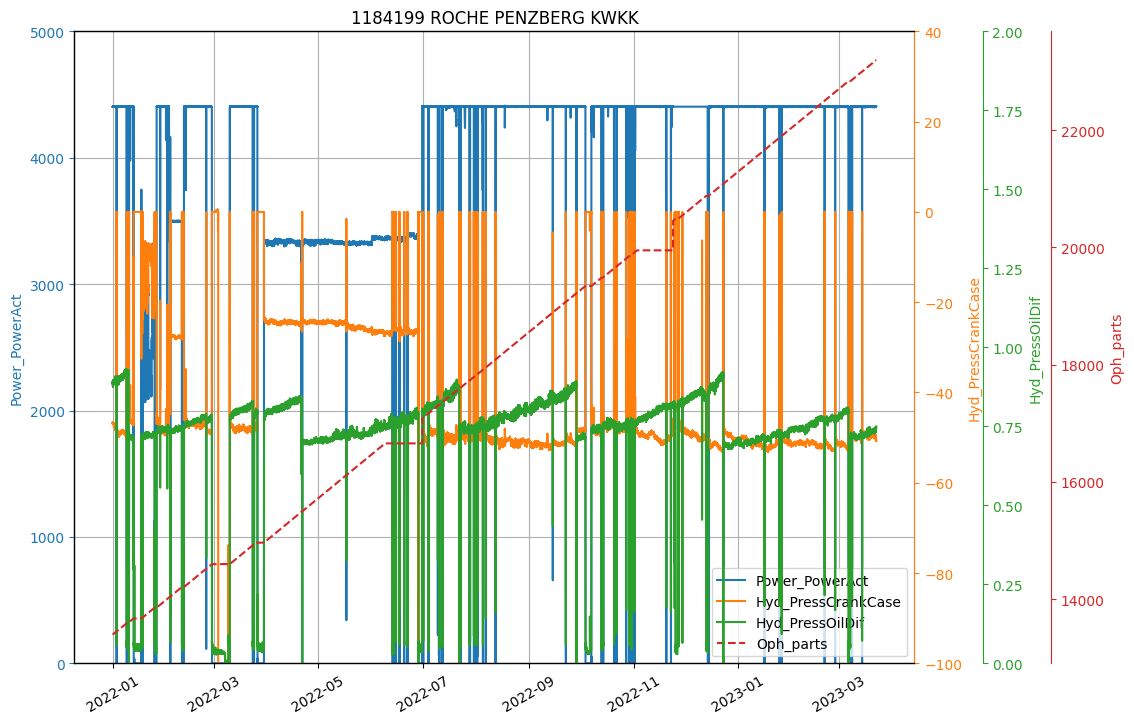

In [19]:
dmyplant2.chart( df0, dset, title = e, figsize=psize);

LOC, all available data received,
Data Start 27.06.2016
Val  Start 27.04.2020


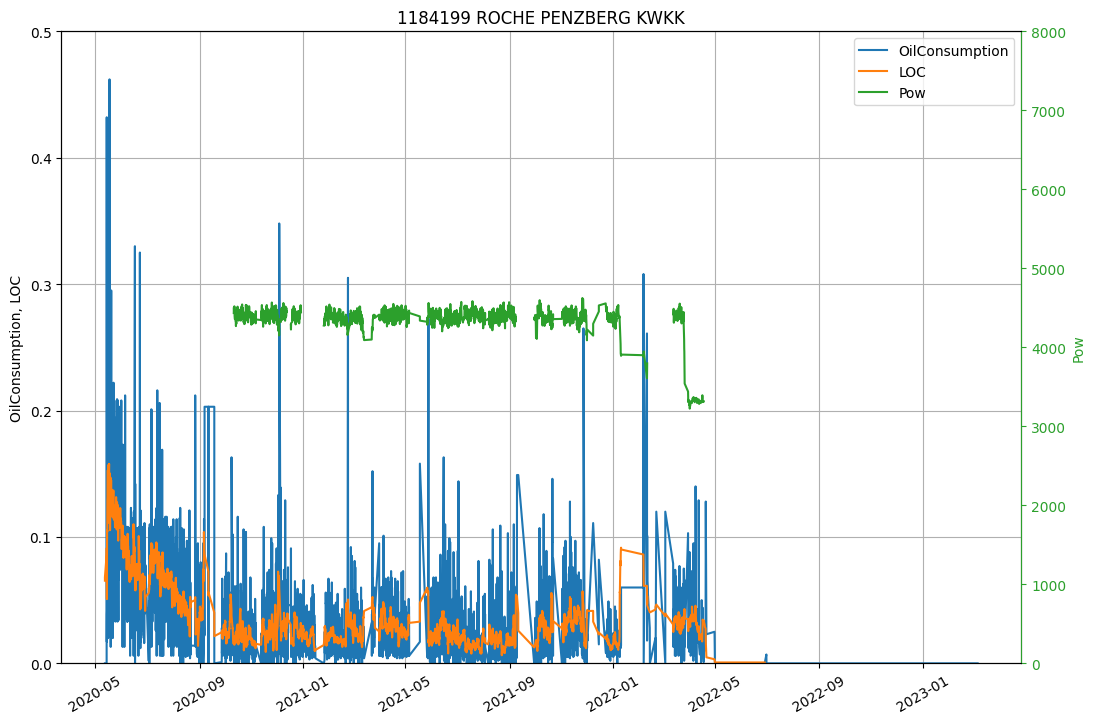

In [20]:
# Lube Oil Consuption data
dloc = e.Validation_period_LOC()

dmyplant2.chart(dloc, [
    {'col': ['OilConsumption','LOC'],'ylim': (0,0.5)},
    {'col': ['Pow'],'ylim': (0,8000)},
],
title = e,
figsize = psize);